In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/marialysak/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DA_GM = df[(df['job_title_short']== 'Data Analyst') & (df['search_location'] == 'Germany')].copy()
df_DA_GM = df_DA_GM.dropna(subset=['salary_year_avg'])
df_DA_GM['salary_year_avg'].head(10)

20066      75067.5
51100     111175.0
51476     166419.5
56790     111175.0
57582      89100.0
58368     105650.0
89707      80850.0
110336     56381.0
127888    111175.0
137735    105650.0
Name: salary_year_avg, dtype: float64

<Axes: >

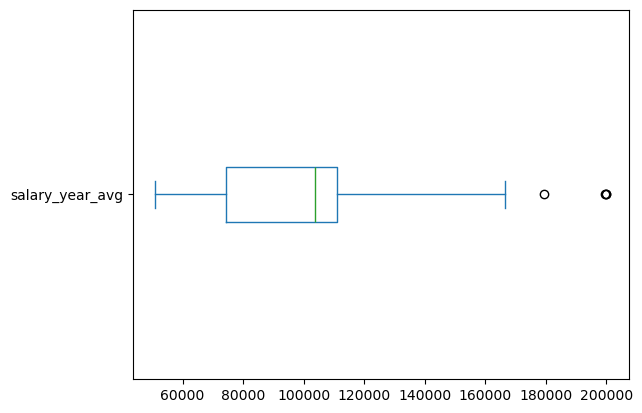

In [7]:
df_DA_GM['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x15c37c910>,
 'caps': [<matplotlib.lines.Line2D at 0x15c37cb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c37c7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15c37ce10>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c37cf50>],
 'means': []}

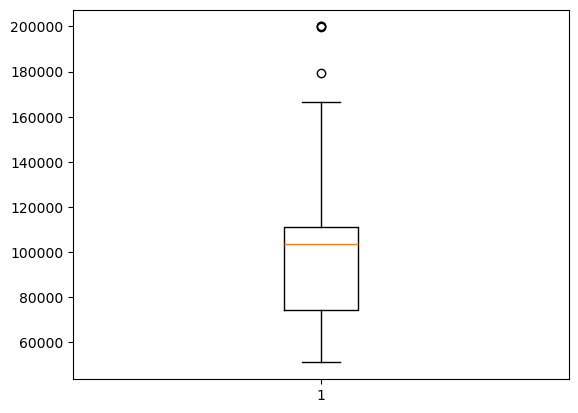

In [6]:
plt.boxplot(df_DA_GM['salary_year_avg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15c663ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x15c69c190>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c663d90>,
 'medians': [<matplotlib.lines.Line2D at 0x15c69c410>,
 'fliers': [<matplotlib.lines.Line2D at 0x15c69c550>,
 'means': []}

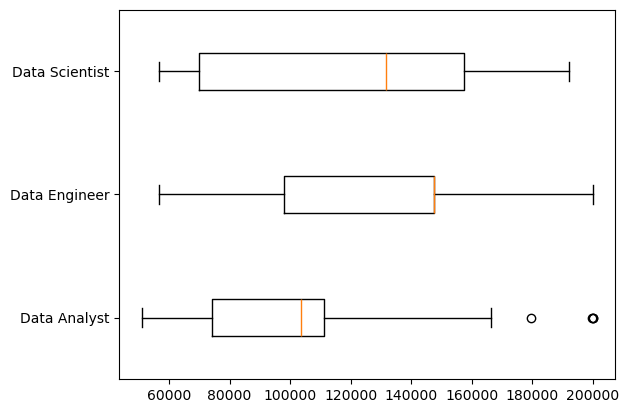

In [19]:
job_titles = ['Data Analyst','Data Engineer', 'Data Scientist']

df_GM = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Germany')].copy()
df_GM = df_GM.dropna(subset=['salary_year_avg'])

job_list = [df_GM[df_GM['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, tick_labels=job_titles, vert=False)

In [13]:
df_GM['salary_year_avg']

1363       56700.0
7772      199675.0
20066      75067.5
28997      56700.0
45652     147500.0
            ...   
773135     98283.0
774818     97444.0
781105    111175.0
784053     56700.0
785682    157500.0
Name: salary_year_avg, Length: 128, dtype: float64

/var/folders/p6/6l2mmqsn4c71l8l4bsnp5bfm0000gn/T/ipykernel_44765/3067186310.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


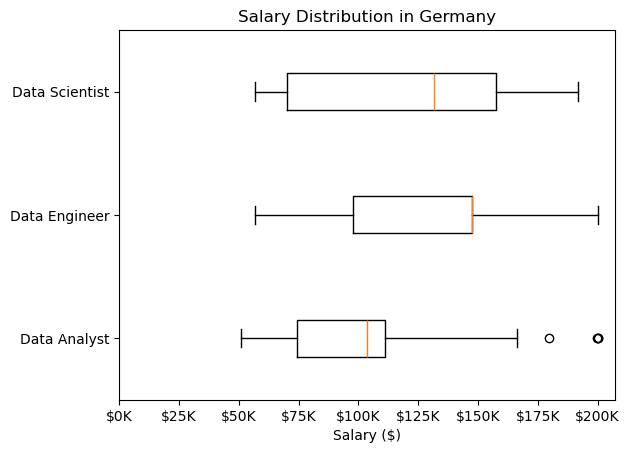

In [22]:
from matplotlib.ticker import FuncFormatter
job_titles = ['Data Analyst','Data Engineer', 'Data Scientist']

df_GM = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Germany')].copy()
df_GM = df_GM.dropna(subset=['salary_year_avg'])
def thousands_formatter(x, pos):
    # Format ticks as $XXK, e.g. 100000 -> $100K
    return f'${int(x/1000)}K'

job_list = [df_GM[df_GM['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xlim(left=0)
plt.title('Salary Distribution in Germany')
plt.xlabel('Salary ($)')
plt.show()

